In [1]:
import sys
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\dyvanoff\anaconda3\envs\diplodatos-ayvd\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dyvanoff\anaconda3\envs\diplodatos-ayvd\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dyvanoff\anaconda3\envs\diplodatos-ayvd\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\dyvanoff\anaconda3\envs\diplodatos-ayvd\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [1]:
# Setting opciones display
pd.set_option('display.max_columns', None)  

NameError: name 'pd' is not defined

### Dataset Productos

Productos: información de los productos vendidos. Contiene:

- sku: identificador de producto

- descripcion: descripcion del producto enmascarado

- marca: marca del producto

- id categoria: identificador de categoria a la cual pertenece el producto

- presentacion: forma de presentacion de producto (pack, kilogramos, etc)

- unidadcm3: cm3 del producto

- unidadkg: kg del producto

- id proveedor: identificador del proveedor del producto


In [3]:
# Lectura del dataset Productos
productos = pd.read_csv('./dataset/productos.zip', delimiter=';', encoding='latin-1')

In [4]:
# Vemos las primeras 5 filas
productos.head()

sku          descripcion     marca  id_categoria presentacion  unidadcm3  \
0  223  PACKXX-XX-X-XXXRIDO     GRIDO            58         Pack      0.641   
1  224  PACKXX-XX-X-XXXRIDO     GRIDO            57         Pack      0.769   
2  225  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack      0.595   
3  226  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack      0.699   
4  227  PACKXX-XX-X-XXXBANA  VIA BANA            40         Pack      5.000   

   unidadkg  id_proveedor  
0     3.312             2  
1     4.224             2  
2     3.312             2  
3     4.224             2  
4     5.000             2

In [5]:
# Vemos los tipos de datos
productos.dtypes.to_frame()

0
sku             int64
descripcion    object
marca          object
id_categoria    int64
presentacion   object
unidadcm3     float64
unidadkg      float64
id_proveedor    int64

In [6]:
# Correcciones de precios hecho por el negocio
productos.loc[productos.sku==3170,'unidadkg']="2.565"
productos.loc[productos.sku==3171,'unidadkg']="2.565"
productos.loc[productos.sku==12150,'unidadkg']="8.325"
productos.loc[productos.sku==3095,'unidadkg']="786.72"
productos.loc[productos.sku==22660,'unidadkg']="0.6"

In [7]:
# Verificamos si tiene valores Nan
productos.isna().sum().to_frame()

0
sku           0
descripcion   0
marca         0
id_categoria  0
presentacion  0
unidadcm3     0
unidadkg      0
id_proveedor  0

In [8]:
# Verificamos si productos tiene sku duplicados
productos['sku'].duplicated().any()

False

In [9]:
# Verificamos las dimensiones del dataframe
productos.shape

(4352, 8)

Veamos las presentaciones disponibles en productos

In [10]:
productos.presentacion.value_counts()

Pack           2371
Unidades       1106
No Asignada     576
Kilogramos      148
Baldes          136
                 15
Name: presentacion, dtype: int64

Verificamos si presentacion tiene nulos

In [11]:
productos.presentacion.isna().sum()

0

Como se puede observar existen presentaciones que no son nulos pero que tampoco son NaN. Tener en cuenta este hecho en el análisis y decisiones que se tomen al respecto en cada práctico.

### Dataset Categorias

Categorias: información de categoria de productos vendidos: Contiene
- id categoria: identificador de categoria.
- nombre: nombre de la categoria

In [12]:
# Lectura del dataset Categorias
categorias = pd.read_csv('./dataset/categorias.zip', delimiter=';', encoding='latin-1')

In [13]:
# Vemos las primeras 5 filas
categorias.head()

id_categoria                          nombre
0            35      05 - Pack Impulsivos Grido
1            36           07 - Pack Potes Grido
2            37  06 - Pack Postres/Tortas Grido
3            38                 000 - GRIDO MIX
4            39                     08 - Otros.

In [14]:
# Vemos los tipos de datos
categorias.dtypes.to_frame()

0
id_categoria   int64
nombre        object

In [15]:
# Verificamos si tiene valores Nan
categorias.isna().sum().to_frame()

0
id_categoria  0
nombre        0

In [16]:
# Verificamos las dimensiones del dataframe
categorias.shape

(88, 2)

### Dataset Puntos de Venta

Puntos de venta: información de puntos de ventas. Contiene:
- id_punto_venta: identificador de punto de venta
- nombre: nombre de punto de venta enmascarado
- id_provincia: identificador de la provincia a la que pertenece el punto de venta
- id_localidad: identificador de la localidad a la que pertenece el punto de venta
- id_pais: identificador del pais al que pertenece el punto de venta


In [17]:
# Lectura del dataset Punto de Venta
pdv = pd.read_csv('dataset/puntos_de_venta.zip', delimiter=';', encoding='latin-1')

In [18]:
# Vemos las primeras 5 filas
pdv.head()

id_punto_venta           nombre  id_Provincia  id_Localidad  id_Pais
0         100001  MONXXX-XX-XXSTO             5          1890        1
1         100002  SAMXXX-XX-XXCHO             5          2018        1
2         100003  VA.XXX-XX-XXE I             5          2124        1
3       100003-1  VILXXX-XX-XXIII             5          2124        1
4         100004  SUCXXX-XX-XXCRE            18          4263        1

In [19]:
# Vemos los tipos de datos
pdv.dtypes.to_frame()

0
id_punto_venta  object
nombre          object
id_Provincia     int64
id_Localidad     int64
id_Pais          int64

In [20]:
# Verificamos si tiene valores Nan
pdv.isna().sum().to_frame()

0
id_punto_venta  0
nombre          0
id_Provincia    0
id_Localidad    0
id_Pais         0

In [21]:
# Verificamos las dimensiones del dataframe
pdv.shape

(1850, 5)

In [24]:
# Paises relacionados a punto de ventas
pdv.id_Pais.unique()

array([1, 3], dtype=int64)

### Ventas Dataset

Ventas: información de ventas. Contiene:
- dia: dia de la venta
- mes: mes de la venta
- año: año de la venta
- hora: hora en que se produzco la venta
- sku: identificador de producto
- cantidad pedida: cantidad comprada por punto de venta
- id_punto_venta: identificador de punto de venta


In [25]:
# Lectura del dataset Ventas
ventas = pd.read_csv('dataset/ventas.zip', delimiter=';', encoding='latin-1')

In [26]:
# Vemos las primeras 5 filas
ventas.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta
0    4    1  2018  15:05:34.0000000  3071              1.0         100000
1    4    1  2018  15:05:34.0000000  1872              4.0         100000
2    4    1  2018  15:05:34.0000000  2008              4.0         100000
3    4    1  2018  15:05:34.0000000  2009              4.0         100000
4    4    1  2018  15:05:34.0000000  1918              4.0         100000

In [27]:
# Creamos el campo fecha
ventas['fecha'] = ventas['anio'].astype(str) + '-' + ventas['mes'].astype(str).str.zfill(2) + '-' + ventas['dia'].astype(str).str.zfill(2)

In [28]:
# Vemos las primeras 5 filas
ventas.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:05:34.0000000  3071              1.0         100000   
1    4    1  2018  15:05:34.0000000  1872              4.0         100000   
2    4    1  2018  15:05:34.0000000  2008              4.0         100000   
3    4    1  2018  15:05:34.0000000  2009              4.0         100000   
4    4    1  2018  15:05:34.0000000  1918              4.0         100000   

        fecha  
0  2018-01-04  
1  2018-01-04  
2  2018-01-04  
3  2018-01-04  
4  2018-01-04

In [29]:
# Vemos los tipos de datos
ventas.dtypes.to_frame()

0
dia                int64
mes                int64
anio               int64
hora              object
sku                int64
cantidad_pedida  float64
id_punto_venta    object
fecha             object

In [30]:
# Convertimos a datetime el atributo fecha
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [31]:
# Vemos los tipos de datos con fecha como datetime
ventas.dtypes.to_frame()

0
dia                       int64
mes                       int64
anio                      int64
hora                     object
sku                       int64
cantidad_pedida         float64
id_punto_venta           object
fecha            datetime64[ns]

In [32]:
# Verificamos si tiene valores Nan
ventas.isna().sum().to_frame()

0
dia              0
mes              0
anio             0
hora             0
sku              0
cantidad_pedida  0
id_punto_venta   0
fecha            0

In [33]:
# Vemos las primeras 5 filas
ventas.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:05:34.0000000  3071              1.0         100000   
1    4    1  2018  15:05:34.0000000  1872              4.0         100000   
2    4    1  2018  15:05:34.0000000  2008              4.0         100000   
3    4    1  2018  15:05:34.0000000  2009              4.0         100000   
4    4    1  2018  15:05:34.0000000  1918              4.0         100000   

       fecha  
0 2018-01-04  
1 2018-01-04  
2 2018-01-04  
3 2018-01-04  
4 2018-01-04

In [34]:
# Verificamos las dimensiones del dataframe
ventas.shape

(5666365, 8)

### Dataset Lookup paises, provincias, localidades

Paises: información de paises. Contiene:
- id pais: identificador de país
- nombre: nombre de país

Provincias: información de provincias. Contiene:
- id provincia: identificador de provincia
- nombre: nombre de provincia

Localidades: información de localidades. Contiene:
- id localidad: identificador de localidad
- nombre: nombre de la localidad


In [35]:
# Lectura del dataset Paises, Provincias y Localidades

paises = pd.read_csv('dataset/paises.zip', delimiter=';', encoding='latin-1')
provincias = pd.read_csv('dataset/provincias.zip', delimiter=';', encoding='latin-1')
localidades = pd.read_csv('dataset/localidades.zip', delimiter=';', encoding='latin-1')

In [36]:
# Vemos las primeras 5 filas
paises.head()

id_Pais     nombre
0        1  Argentina
1        2      Chile
2        3    Uruguay
3        5   Paraguay
4        7    Bolivia

In [37]:
# Vemos los tipos de datos
paises.dtypes.to_frame()

0
id_Pais   int64
nombre   object

In [38]:
# Verificamos si tiene valores Nan
paises.isna().sum().to_frame()

0
id_Pais  0
nombre   0

In [39]:
# Vemos las primeras 5 filas
localidades.head()

id_Localidad         nombre
0             2        Córdoba
1          1737      La Calera
2          2124  Villa Allende
3          1431    Alta Gracia
4          1599     Deán Funes

In [40]:
# Vemos los tipos de datos
localidades.dtypes.to_frame()

0
id_Localidad   int64
nombre        object

In [41]:
# Verificamos si tiene valores Nan
localidades.isna().sum().to_frame()

0
id_Localidad  0
nombre        0

In [42]:
# Vemos las primeras 5 filas
provincias.head()

id_Provincia               nombre
0             5              Córdoba
1            11             La Rioja
2            20             Santa Fe
3            21  Santiago del Estero
4             2            Catamarca

In [43]:
# Vemos los tipos de datos
provincias.dtypes.to_frame()

0
id_Provincia   int64
nombre        object

In [44]:
# Verificamos si tiene valores Nan
provincias.isna().sum().to_frame()

0
id_Provincia  0
nombre        0

# Union de Datos para Obtener Dataset para trabajar

In [45]:
# Unimos productos y categorias
productos_categoria=pd.merge(productos,categorias,on='id_categoria').rename(columns={'nombre':'categoria'})

In [46]:
productos_categoria.shape

(4352, 9)

In [47]:
# Vemos las primeras 5 filas
productos_categoria.head()

sku          descripcion        marca  id_categoria presentacion  \
0   223  PACKXX-XX-X-XXXRIDO        GRIDO            58         Pack   
1  1021  PACKXX-XX-X-XXX X 8  SIN DEFINIR            58     Unidades   
2   224  PACKXX-XX-X-XXXRIDO        GRIDO            57         Pack   
3   332  PACKXX-XX-X-XXXRIDO        GRIDO            57   Kilogramos   
4   333  PACKXX-XX-X-XXXRIDO        GRIDO            57   Kilogramos   

   unidadcm3 unidadkg  id_proveedor        categoria  
0      0.641    3.312             2  12 - IMPULSIVOS  
1      0.641    3.216             2  12 - IMPULSIVOS  
2      0.769    4.224             2  11 - IMPULSIVOS  
3      0.769      3.6             2  11 - IMPULSIVOS  
4      0.769    4.032             2  11 - IMPULSIVOS

In [48]:
ventas.shape

(5666365, 8)

In [49]:
productos_categoria.shape

(4352, 9)

In [50]:
# Unimos ventas con producto_categoria con left join
ventas_producto = pd.merge(ventas,productos_categoria,left_on='sku',right_on='sku',how='left')

In [51]:
ventas_producto.shape

(5666365, 16)

In [52]:
ventas_producto.dtypes.to_frame()

0
dia                       int64
mes                       int64
anio                      int64
hora                     object
sku                       int64
cantidad_pedida         float64
id_punto_venta           object
fecha            datetime64[ns]
descripcion              object
marca                    object
id_categoria            float64
presentacion             object
unidadcm3               float64
unidadkg                 object
id_proveedor            float64
categoria                object

In [53]:
ventas_producto.isna().sum().to_frame()

0
dia              0
mes              0
anio             0
hora             0
sku              0
cantidad_pedida  0
id_punto_venta   0
fecha            0
descripcion      2
marca            2
id_categoria     2
presentacion     2
unidadcm3        2
unidadkg         2
id_proveedor     2
categoria        2

In [54]:
# Chequeo Nulos 
ventas_producto[ventas_producto.categoria.isna()]

dia  mes  anio              hora   sku  cantidad_pedida  \
5499999   16   10  2019  07:59:10.4300000  9282              6.0   
5500001   16   10  2019  08:03:43.7830000  9282              6.0   

        id_punto_venta      fecha descripcion marca  id_categoria  \
5499999            727 2019-10-16         NaN   NaN           NaN   
5500001          727-1 2019-10-16         NaN   NaN           NaN   

        presentacion  unidadcm3 unidadkg  id_proveedor categoria  
5499999          NaN        NaN      NaN           NaN       NaN  
5500001          NaN        NaN      NaN           NaN       NaN

In [55]:
# cantidad de productos informados en las ventas
len(ventas['sku'].unique())

588

In [56]:
# Vemos las primeras 5 filas
ventas_producto.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:05:34.0000000  3071              1.0         100000   
1    4    1  2018  15:05:34.0000000  1872              4.0         100000   
2    4    1  2018  15:05:34.0000000  2008              4.0         100000   
3    4    1  2018  15:05:34.0000000  2009              4.0         100000   
4    4    1  2018  15:05:34.0000000  1918              4.0         100000   

       fecha          descripcion    marca  id_categoria presentacion  \
0 2018-01-04  GRIDXX-XX-X-XXXTOS)    GRIDO          38.0     Unidades   
1 2018-01-04  PACKXX-XX-X-XXXGRS.  FRIZZIO         112.0         Pack   
2 2018-01-04  PACKXX-XX-X-XXXgrs0  FRIZZIO         112.0         Pack   
3 2018-01-04  PACKXX-XX-X-XXX GRS  FRIZZIO         112.0         Pack   
4 2018-01-04  PACKXX-XX-X-XXX GRS  FRIZZIO         112.0     Unidades   

   unidadcm3 unidadkg  id_proveedor        categoria  
0      1.760  680.316           2.0  000 - GRIDO MIX  
1      1.190     6.12           2.0     01 - FRIZZIO  
2      1.042     6.08           2.0     01 - FRIZZIO  
3      1.190     6.08           2.0     01 - FRIZZIO  
4      1.042      3.6           2.0     01 - FRIZZIO

In [57]:
pdv.shape

(1850, 5)

In [58]:
localidades.shape

(897, 2)

In [59]:
# Unimos pdv_ubicacion con localidades 
pdv_ubicacion=pdv.merge(localidades,on='id_Localidad').rename(columns={'nombre_x':'Punto_Venta','nombre_y':'Localidad'})

In [60]:
pdv_ubicacion.shape

(1850, 6)

In [61]:
# Vemos las primeras 5 filas
pdv_ubicacion.head()

id_punto_venta      Punto_Venta  id_Provincia  id_Localidad  id_Pais  \
0         100001  MONXXX-XX-XXSTO             5          1890        1   
1         100002  SAMXXX-XX-XXCHO             5          2018        1   
2         100003  VA.XXX-XX-XXE I             5          2124        1   
3       100003-1  VILXXX-XX-XXIII             5          2124        1   
4         100283  VILXXX-XX-XXNDE             5          2124        1   

       Localidad  
0    Montecristo  
1       Sampacho  
2  Villa Allende  
3  Villa Allende  
4  Villa Allende

In [62]:
# Unimos pdv_ubicacion con provincias
pdv_ubicacion=pdv_ubicacion.merge(provincias,on='id_Provincia').rename(columns={'nombre':'Provincia'})

In [63]:
pdv_ubicacion.shape

(1850, 7)

In [64]:
# Vemos las primeras 5 filas
pdv_ubicacion.head()

id_punto_venta      Punto_Venta  id_Provincia  id_Localidad  id_Pais  \
0         100001  MONXXX-XX-XXSTO             5          1890        1   
1         100002  SAMXXX-XX-XXCHO             5          2018        1   
2         100003  VA.XXX-XX-XXE I             5          2124        1   
3       100003-1  VILXXX-XX-XXIII             5          2124        1   
4         100283  VILXXX-XX-XXNDE             5          2124        1   

       Localidad Provincia  
0    Montecristo   Córdoba  
1       Sampacho   Córdoba  
2  Villa Allende   Córdoba  
3  Villa Allende   Córdoba  
4  Villa Allende   Córdoba

In [65]:
# Unimos pdv_ubicacion con paises
pdv_ubicacion=pdv_ubicacion.merge(paises,on='id_Pais').rename(columns={'nombre':'Pais'})

In [66]:
pdv_ubicacion.shape

(1850, 8)

In [67]:
# Vemos las primeras 5 filas
pdv_ubicacion.head()

id_punto_venta      Punto_Venta  id_Provincia  id_Localidad  id_Pais  \
0         100001  MONXXX-XX-XXSTO             5          1890        1   
1         100002  SAMXXX-XX-XXCHO             5          2018        1   
2         100003  VA.XXX-XX-XXE I             5          2124        1   
3       100003-1  VILXXX-XX-XXIII             5          2124        1   
4         100283  VILXXX-XX-XXNDE             5          2124        1   

       Localidad Provincia       Pais  
0    Montecristo   Córdoba  Argentina  
1       Sampacho   Córdoba  Argentina  
2  Villa Allende   Córdoba  Argentina  
3  Villa Allende   Córdoba  Argentina  
4  Villa Allende   Córdoba  Argentina

In [68]:
ventas_producto.shape

(5666365, 16)

In [69]:
# Unimos ventas_producto con pdv_ubicacion con left join
ventas_producto_pdv = pd.merge(ventas_producto,pdv_ubicacion,left_on='id_punto_venta',right_on='id_punto_venta',how='left')

In [70]:
ventas_producto_pdv.shape

(5666365, 23)

In [71]:
# Vemos las primeras 5 filas
ventas_producto_pdv.head()

dia  mes  anio              hora   sku  cantidad_pedida id_punto_venta  \
0    4    1  2018  15:05:34.0000000  3071              1.0         100000   
1    4    1  2018  15:05:34.0000000  1872              4.0         100000   
2    4    1  2018  15:05:34.0000000  2008              4.0         100000   
3    4    1  2018  15:05:34.0000000  2009              4.0         100000   
4    4    1  2018  15:05:34.0000000  1918              4.0         100000   

       fecha          descripcion    marca  id_categoria presentacion  \
0 2018-01-04  GRIDXX-XX-X-XXXTOS)    GRIDO          38.0     Unidades   
1 2018-01-04  PACKXX-XX-X-XXXGRS.  FRIZZIO         112.0         Pack   
2 2018-01-04  PACKXX-XX-X-XXXgrs0  FRIZZIO         112.0         Pack   
3 2018-01-04  PACKXX-XX-X-XXX GRS  FRIZZIO         112.0         Pack   
4 2018-01-04  PACKXX-XX-X-XXX GRS  FRIZZIO         112.0     Unidades   

   unidadcm3 unidadkg  id_proveedor        categoria Punto_Venta  \
0      1.760  680.316           2.0  000 - GRIDO MIX         NaN   
1      1.190     6.12           2.0     01 - FRIZZIO         NaN   
2      1.042     6.08           2.0     01 - FRIZZIO         NaN   
3      1.190     6.08           2.0     01 - FRIZZIO         NaN   
4      1.042      3.6           2.0     01 - FRIZZIO         NaN   

   id_Provincia  id_Localidad  id_Pais Localidad Provincia Pais  
0           NaN           NaN      NaN       NaN       NaN  NaN  
1           NaN           NaN      NaN       NaN       NaN  NaN  
2           NaN           NaN      NaN       NaN       NaN  NaN  
3           NaN           NaN      NaN       NaN       NaN  NaN  
4           NaN           NaN      NaN       NaN       NaN  NaN

In [72]:
# Verificamos que features tienen valores nulos
ventas_producto_pdv.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

index       0
0              Pais  667024
1         Provincia  667024
2         Localidad  667024
3           id_Pais  667024
4      id_Localidad  667024
5      id_Provincia  667024
6       Punto_Venta  667024
7         unidadcm3       2
8         categoria       2
9      id_proveedor       2
10         unidadkg       2
11     presentacion       2
12     id_categoria       2
13            marca       2
14      descripcion       2
15              mes       0
16            fecha       0
17   id_punto_venta       0
18  cantidad_pedida       0
19              sku       0
20             hora       0
21             anio       0
22              dia       0

In [73]:
# Verificamos las dimensiones del dataframe
ventas_producto_pdv.shape

(5666365, 23)

In [74]:
# Verificamos los tipos de datos del dataframe resultante
ventas_producto_pdv.dtypes.to_frame()

0
dia                       int64
mes                       int64
anio                      int64
hora                     object
sku                       int64
cantidad_pedida         float64
id_punto_venta           object
fecha            datetime64[ns]
descripcion              object
marca                    object
id_categoria            float64
presentacion             object
unidadcm3               float64
unidadkg                 object
id_proveedor            float64
categoria                object
Punto_Venta              object
id_Provincia            float64
id_Localidad            float64
id_Pais                 float64
Localidad                object
Provincia                object
Pais                     object

### Verificacion de datos con geolocation nulos

In [75]:
pdv_ubicacion[pdv_ubicacion.id_Pais==3]

id_punto_venta      Punto_Venta  id_Provincia  id_Localidad  id_Pais  \
1849              2  CHUXXX-XX-XXRRO            24            23        3   

       Localidad   Provincia     Pais  
1849  Montevideo  Montevideo  Uruguay

In [76]:
ventas[ventas.id_punto_venta==2]

Empty DataFrame
Columns: [dia, mes, anio, hora, sku, cantidad_pedida, id_punto_venta, fecha]
Index: []

In [79]:
# puntos de venta que existen en ventas pero no en puntos de venta
pd.DataFrame(ventas_producto_pdv[ventas_producto_pdv.id_Provincia.isna()].id_punto_venta.unique()).shape

(260, 1)

In [80]:
# datos faltantes de puntos de ventas en ventas
pd.DataFrame(ventas_producto_pdv[ventas_producto_pdv.id_Provincia.isna()].id_punto_venta).shape

(667024, 1)

In [87]:
ventas_producto_pdv[ventas_producto_pdv.id_Provincia.isna()].id_punto_venta.unique()

array(['100000', '100006', '100008-2', '100008-3', '100023', '100017',
       '100070', '100059', '100067-1', '100067', '100050', '100054',
       '100077', '100085', '100104', '100146', '100121-1', '100121',
       '100108', '100074', '100153', '100131', '100130', '100140',
       '100060', '100115', '100115-1', '100115-3', '100085-1', '100115-2',
       '100297', '100159', '100294', '100294-1', '100289', '100161',
       '100287', '100264', '100135', '100210', '100137', '100259',
       '100212', '100244-1', '100244', '100214', '100214-1', '100258',
       '100153-1', '100215', '100261', '100152', '100186', '100230',
       '100224-1', '100234', '100218', '100216-1', '100233', '100177',
       '100245', '100186-1', '100170', '100216', '100232', '100224',
       '100302', '100207', '100265-1', '100280-2', '100257', '100200',
       '100212-1', '100343', '100343-1', '100480', '100591-3', '100333',
       '100453', '100591-5', '100294-2', '100366', '100530', '100591-6',
       '100591-4

In [88]:
# Opciones de compresión para guardar datafrme resultante
compression_opts = dict(method='zip',
                        archive_name='ventas_producto_pdv.csv')  


In [89]:
# Grabamos dataframe resultante
ventas_producto_pdv.to_csv('dataset/ventas_producto_pdv.zip', index=False,
          compression=compression_opts)  

# Distribución de ventas

In [90]:
# Verificamos si cantidad_pedida contiene Nan
ventas_producto_pdv['cantidad_pedida'].isna().sum()

0

In [91]:
# Agrupamos la cantidad_pedida por fecha
df = ventas_producto_pdv.groupby('fecha').sum()['cantidad_pedida'].reset_index()
df

fecha  cantidad_pedida
0   2018-01-01         106769.0
1   2018-01-02          33548.0
2   2018-01-03          50375.0
3   2018-01-04          58923.0
4   2018-01-05          10563.0
..         ...              ...
725 2019-12-27          46229.0
726 2019-12-28           9598.0
727 2019-12-29          46565.0
728 2019-12-30           3764.0
729 2019-12-31          14715.0

[730 rows x 2 columns]

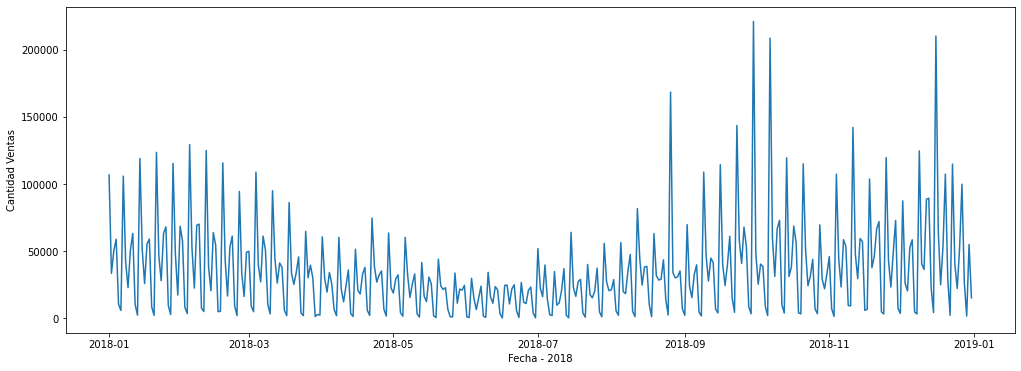

In [92]:
# Graficamos la cantidad_pedida en el año 2018
plt.figure(figsize=(17,6))
sns.lineplot(data=df[df['fecha'].dt.year == 2018], x='fecha', y='cantidad_pedida')
plt.xlabel("Fecha - 2018")
plt.ylabel("Cantidad Ventas")
plt.show()

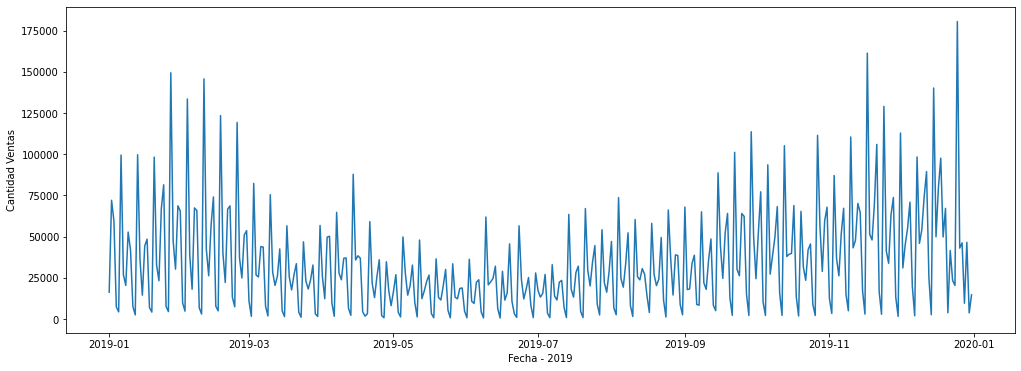

In [93]:
# Graficamos la cantidad_pedida en el año 2019
plt.figure(figsize=(17,6))
sns.lineplot(data=df[df['fecha'].dt.year == 2019], x='fecha', y='cantidad_pedida')
plt.xlabel("Fecha - 2019")
plt.ylabel("Cantidad Ventas")
plt.show()